<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/01Interpolacion_coefs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
from scipy.interpolate import CubicSpline,lagrange
import matplotlib.pyplot as plt

In [50]:
x = np.linspace(0, 5, 6)
y = x**3+2*x**2+x+1

In [51]:
lag = lagrange(x, y)
xi = 1.5
yi = lag(xi)
print(lag)
print(lag.c)

            4     3     2
-5.329e-15 x + 1 x + 2 x + 1 x + 1
[-5.32907052e-15  1.00000000e+00  2.00000000e+00  1.00000000e+00
  1.00000000e+00]


In [52]:
sc = CubicSpline(x, y)
xi = 1.5
yi = sc(xi)
print(sc.c.T)

[[  1.   2.   1.   1.]
 [  1.   5.   8.   5.]
 [  1.   8.  21.  19.]
 [  1.  11.  40.  49.]
 [  1.  14.  65. 101.]]


In [53]:
# Coeficientes de los polinomios por intervalo
coefs = sc.c  # Matriz con [d_i, c_i, b_i, a_i] por intervalo

# Mostrar coeficientes
for i in range(len(x) - 1):
    if x[i]<=xi<=x[i+1]:
      print(f"Intervalo [{x[i]}, {x[i+1]}]:")
      #El coeficiente 𝑎 es el valor de 𝑦 en el nodo izquierdo del intervalo.
      #Los coeficientes 𝑏,𝑐,𝑑 se calculan para garantizar la suavidad en las derivadas y la continuidad en los intervalos.
      d = coefs[0, i]
      c = coefs[1, i]
      b = coefs[2, i]
      a = coefs[3, i]

      yii = a + b*(xi-x[i]) + c*(xi-x[i])**2 + d*(xi-x[i])**3
      print(f'y = {a:e} + {b:e}*(x-{x[i]}) + {c:e}*(x-{x[i]})**2 + {d:e}*(x-{x[i]})**3')
      print(f"xi = {xi},    yii = {yii} [{yi}]")

Intervalo [1.0, 2.0]:
y = 5.000000e+00 + 8.000000e+00*(x-1.0) + 5.000000e+00*(x-1.0)**2 + 1.000000e+00*(x-1.0)**3
xi = 1.5,    yii = 10.375 [10.375]


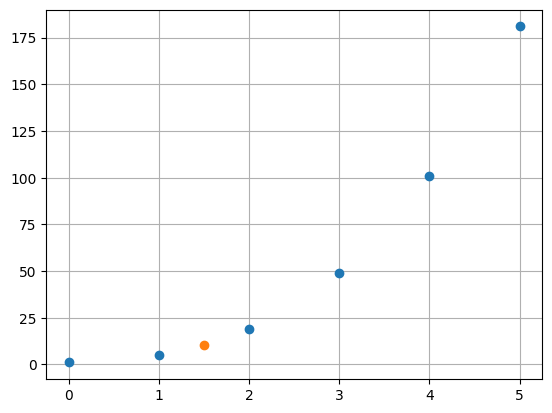

In [54]:
plt.plot(x, y, 'o')
plt.plot(xi, yi, 'o')
plt.grid()
plt.show()